In [30]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import r2_score
import seaborn as sns

In [42]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [43]:
df = pd.read_csv("../data/A2a.smi",sep=" ",header=None)
df.columns = ["SMILES","Name","pIC50"]

In [44]:
%time fp_list = fp_list_from_smiles_list(df.SMILES)


CPU times: user 120 ms, sys: 3.22 ms, total: 123 ms
Wall time: 121 ms


In [45]:
df['fp'] = fp_list

In [46]:
train, test = train_test_split(df)

In [47]:
xgb = XGBRegressor(objective='reg:squarederror')

In [53]:
xgb.fit(np.array(list(train.fp.values)),train.pIC50)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
pred = xgb.predict(np.array(list(test.fp)))

In [55]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

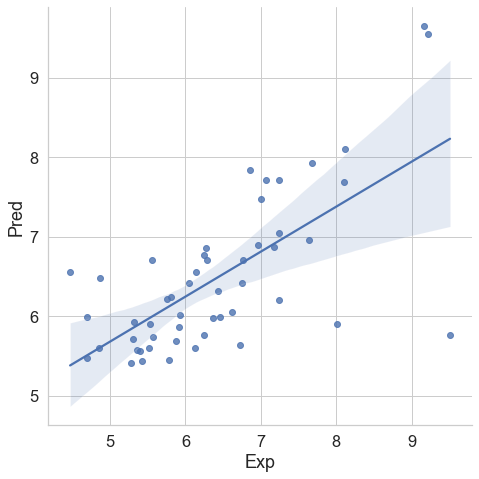

In [56]:
pred_df = pd.DataFrame()
pred_df["Exp"] = test.pIC50
pred_df["Pred"] = pred
ax = sns.lmplot("Exp","Pred",data=pred_df,height=7,aspect=1)

In [57]:
r2_score(test.pIC50,pred)

0.42572586110694055